In [1]:
#notes for reference:

##clinical data csv has 4 columns: Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites

##mouse drug csv has 2 columns: Mouse ID,Drug  & 
#compares: Stelasyn, Naftisol, Ketapril, Capomulin, Infubinol, Ceftamin, 
#Propriva, Zoniferol, Ramicane, and Placebo  (9 and the placebo)   

## Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.



In [24]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"



In [25]:
#Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv("../data/mouse_drug_data.csv")
clinical_trial_data_df = pd.read_csv("../data/clinicaltrial_data.csv")



In [26]:
# Combine the data into a single dataset
mouse_clinicaldata_combine_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, how='outer', on="Mouse ID")
mouse_clinicaldata_combine_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [27]:
mouse_clinicaldata_combine_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [28]:
#TUMOR RESPONSE TO TREATMENT
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_gp_mean = mouse_clinicaldata_combine_df.groupby(["Drug", "Timepoint"]).mean()
combine_gp_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_gp_mean)

# Preview DataFrame
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [29]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#https://www.geeksforgeeks.org/python-pandas-dataframe-sem/
combine_stderror = mouse_clinicaldata_combine.groupby(["Drug", "Timepoint"]).sem()
combine_stderror.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_vol_df = pd.DataFrame(combine_stderror)

# Preview DataFrame
tumor_response_vol_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [30]:
# Minor Data Munging to Re-Format the Data Frames
reformat_tumor_response_vol_df = tumor_response_vol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_tumor_response_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


FileNotFoundError: [Errno 2] No such file or directory: 'images\\Tumor Response to Treatment.png'

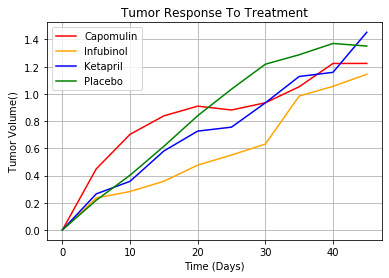

In [31]:
# Generate the Plot (with Error Bars)
x_axis = reformat_tumor_response_vol_df.index
y_axis1 = reformat_tumor_response_vol_df['Capomulin']
y_axis2 = reformat_tumor_response_vol_df['Infubinol']
y_axis3 = reformat_tumor_response_vol_df['Ketapril']
y_axis4 = reformat_tumor_response_vol_df['Placebo']

plt.errorbar(x_axis,y_axis1,label='Capomulin', color='red');
plt.errorbar(x_axis,y_axis2,label='Infubinol', color='orange');
plt.errorbar(x_axis,y_axis3,label='Ketapril', color='blue');
plt.errorbar(x_axis,y_axis4,label='Placebo', color='green')

plt.grid()

plt.legend(loc='best')

plt.title('Tumor Response To Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume' + "$()$")

# Save the Figure
plt.savefig("images\Tumor Response to Treatment.png")

# Show the Figure
plt.show()

In [32]:
# Show the Figure
plt.show()

In [33]:
# METASTATIC RESPONSE TO TREATMENT
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_data_df = mouse_clinicaldata_combine_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean
# Convert to DataFrame
met_site_data_df = pd.DataFrame(met_site_data_df)
# Preview DataFrame
met_site_data_df.head()

ValueError: DataFrame constructor not properly called!

In [34]:
met_site_data_df = met_site_data_df.reset_index()
met_site_data_df.head()


AttributeError: 'function' object has no attribute 'reset_index'

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

In [ ]:
#SURVIVAL RATES
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [ ]:
#SUMMARY BAR GRAPH
# Calculate the percent changes for each drug

# Display the data to confirm

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()